Project for the course of Microeconometrics _ Summer 2020, M.Sc. Economics, University of Bonn _ [Solmaz Ahmadi](https://github.com/solmazahmadi).

---

 __Replication of Bronzini, R., & Lachini, E. (2014).__

In this notebook, we replicate the key results of the following paper:

>  ***Bronzini, R., & Lachini, E. (2014). Are incentives for R&D effective? Evidence from a regression discontinuity approach. American Economic Journal: Economic Policy, 6(4), 100-134.***


__How to access this notebook:__

- Our notebook is located in the [GitHub Repository](https://github.com/solmazahmadi/microeconometrics-course-project-solmazahmadi). Other viewing options like *MyBinder*  or *NBViewer* may have issues with displaying images or coloring of certain parts (missing images can be viewed in the folder [images]() on GitHub).

- The link to access the original paper, data and code provided by the authors is [here](https://www.aeaweb.org/articles?id=10.1257/pol.6.4.100).

__How to distinguish the replication from our contribution__

- For the ease of camparison, we preserve the paper's original structure. All sections, tables and figures which are related to the replication task are titled and and labeled as they appear in Bronzini, R., & Iachini, E. (2014). 

- For the sake of transparency, all parts including our independent contribution -additional external evidence, robustness checks, visualization in the replication are marked as extensions.



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Replication-of-Bronzini,-R.,-&amp;-Iachini,-E.-(2014)." data-toc-modified-id="Replication-of-Bronzini,-R.,-&amp;-Iachini,-E.-(2014).-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span><strong>Replication of Bronzini, R., &amp; Iachini, E. (2014).</strong></a></span></li></ul></li><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Table of Contents</strong></a></span></li></ul></div>

In [61]:
#Install required packages
import numpy as np
import pandas as pd
# import scipy as sp
import pandas.io.formats.style
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sma
import statsmodels.api as sm_api
import matplotlib.pyplot as plt
from IPython.display import HTML
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression, LinearRegression

#import econtools.metrics as mt
# from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [62]:
from auxiliary_get_key_varaibles import get_key_variables
#from auxiliary_get_key_varaibles import get_firms_distribution


# 1. Introduction

Bronzini and Lachini (2014) study the effects of a unique R&D subsidy program executed in northern Italy on investment expenditures of firms. The public R&D funding is a government policy that aims to trigger marginal projects, those that would not be carried out without the subventions. The economic rationale behind the R&D subsidies is firstly to conquer market failure of knowledge as a public good the positive externalities of which cannot be fully internalized by the firm. secondly, the government grants aid to overcome the firm's liquidity constraints. Firms were asked to present a proposal for their new projects and an independent technical committee scores them. Only firms whose scores were exceeded a specific threshold were awarded public grants. To estimate the causal impact of subsidies, Bronzini and Lachini (2014) apply a sharp regression discontinuity design (RDD) comparing the private investment spending of funded and nonfunded firms with scores close to the threshold. Among nonexperimental econometric methods, the regression discontinuity controls preferably for the endogeneity of treatment since it can be shown as a randomized experiment by arguing that the agents had been randomly drawn just below or just above the cutoff. The paper finds for the whole sample of firms, the investment expenditures do not increase significantly. since the overall impact hides the considerable heterogeneity in the program’s effect, Bronzini and Lachini (2014) divide the sample by small and large firms and demonstrate that although the subsidy did not affect large enterprises' investment spending, small companies raised their investments—by roughly the amount of the grant they gained.


The Model variables are as follows:

|     Treatment    |            Main outcome variables             |      Main covriates    | Forcing Variable      |
|----------------- |---------------------------------------------- |----------------------- |-------|
|  R&D subsidy (T) |Total investment/pre-program sales (INVSALES)  |          Size          |   Score|
|        -         |Tangible investment/pre-program sales (INVTSALES)|  Coverage ratio (CR) |       |
|        -         |Intangible investment/pre-program sales (INVINTSALES)|     Age          |       |
|        -         |Total investment/pre-program total assets (INVA)|                       |       |
|        -         |Total investment/pre-program total capita (INVK)|                       |       |
|                  |Labor cost/pre-program sales (INVSALES)|                                |       |
|                  |Service cost/pre-program sales (INVSALES)|                              |       |


The rest of notbook is structured as follows. In the second section, we review the theoretical framework for the paper. Sectin 3 describes the identification strategy utilized by the authors to unravel causal effects of gorment subsidy program on investment expenditure of companies. Section 4 discusses the paper emprical method used for the estimation. In section 5, we replicate the key results of the paper by Bronzini and Lachini (2014) and discuss it in detail. Section 6 conducts and evaluates the results using multiple robustness checks. finaly, last section colcludes remarks.

# add from 13.06

##                                           I. Conceptual Framework and Empirical Evidence

Although theoretically government R&D subsidies lead to a decline in the capital cost, an increase in investment profitability and subsequent expansion of firm’s R&D investment, the type of funded project determines the effectiveness of the grant. The policy would be effective if the grant triggers the marginal projects, which would not have been profitable without public funding. However, the program would be ineffective if the grant finances the inframarginal projects, which would have been undertaken even in the absence of public grants. Marginal projects are profitable with private financing; therefore, in case of receiving government funding, the firm will substitute private for public funding to exploit the lower capital cost of public subsidies, and no positive impact on R&D investment happens. 

To assess the program’s effectiveness, the paper takes three considerations. First, Ceteris paribus, the success of the program might be affected by subsidizing the projects which were recognized as privately financed unprofitable by their companies because the firms face asymmetric information and problems in accessing markets of the capital. Second, firms are less willing to finance their projects since the risk of R&D investment is higher than other types of investments and the importance of R&D is less clear for companies. Moreover, the asymmetric information and the fear of leaks of their idea to rival agents keep them from sharing their knowledge with financial intermediaries. from another angle, the intermediaries may be eager to reward the tangible investments to keep the chance of obtaining them as collaterals. Third, even the professional public committee might not be able to differentiate between marginal and inframarginal projects due to the lack of all necessary information, which decreases the impact of the program. Furthermore, government institutions might be applied to funding inframarginal since the probability of their success is higher and they can convince public opinion about the effectiveness of the policy. Besides the abovementioned directs impacts, several positive indirect effects are producing the crowding to increase the potential outcome. the assignment of the grant may demonstrate the profitability of the project reducing the as info and cost of capital. Also, employing public funds, firms could upgrade their equipment and hire well-skilled researches that benefit current and subsequent projects and results in future profit streams. 

##          A. Empirical Evidence

The review of the empirical literature on the effects of R&D subsidies shows the major challenge in the evaluation of policy is that the firms in treatment and control groups are not randomly chosen. That is, there are critical unobservable characteristics in correlation with outcome variable which differentiate the funded companies from non-funded ones; consequently, the identifying feature for subsidy assignment is endogenous. The paper argues that recent researches addressed the endogeneity problem through the matching or instrumental variable methods and the results are usually sensitive to the selection of methodology and irrespective of the strategy adopted, the conclusions of earlier studies are mixed and inconclusive.

 <font size="0.1">Surveying firm-level analyses conducted in the previous three decades, David, Hall, and Toole (2000) observe that almost one-half (9 out of 19) of the policies were not found to trigger additional investment while for the other half the opposite
was true. More recent evidence is similarly inconclusive. In the case of the Small Business Innovation Research program in the United States, two studies reach opposite conclusions. Matching subsidized and unsubsidized firms by industry and size, Lerner (1999) finds that the policy increased the sales and employment of subsidized firms. By contrast, Wallsten (2000), using the amount of public funds available for each type of R&D investment in each year as an instrument for the subsidy, shows that grants did not lead to an increase in employment and that the public
subsidy crowded out firm-financed R&D dollar for dollar. The evidence available for other countries is also mixed. For Israel, Lach (2002) finds that grants createdadditional R&D investment for small firms but, since the greatest share of the subsidies was given to large firms that did not make additional investment, the overall impact was null. He compared the performance of subsidized and nonsubsidized firms using difference-in-differences (DID) estimates and controlling for severalobservables. Almus and Czarnitzki (2003) use matching strategies to study R&D subsidies in Eastern Germany, finding an overall positive and significant effect oninvestment. González, Jaumandreu, and Pazó (2005) examine the effects of R&Dpolicies in Spain, estimating simultaneously the probability of obtaining a subsidy,
assuming a set of firms’ observables as predetermined (e.g., size, age, industry, location, capital growth), and the impact of the grant on investment. They find a positive,albeit very small, effect on private investment that turns out to be significantly largerfor small firms. Combining the matching method with DID estimations, Görg and Strobl (2007) find that in Ireland only small grants had additional effects on private R&D investment, while large grants crowded out private investment. Hussinger(2008) uses two-step selection models to show that in Germany public subsidies
were effective in promoting firms’ R&D investment. Finally, Jacob and Lefgren (2011) use a similar method to ours to estimate the impact of public grants on US researchers’ output measured by the number of published articles and citations, and find a limited impact of public support. Meanwhile Takalo, Tanayama, and Toivanen
(2013), using a structural model estimated on firm-level data from Finland, find positive general equilibrium effects of the subsidies on expected welfare—i.e., the expected benefits of the program net of its costs—although the expected effects of the incentives are highly heterogeneous. </font>



## II. The Program

  In 2003, the inauguration of the “Regional Program for Industrial Research, Innovation and Technological Transfer,” by the government of Emilia-Romagna leads to the implementation of the public financing R&D program. The goal of the program is to get behind the enterprises' research in each region and help them with the pre-competitive development activities -the activity necessary to convert the output of research into a plan, project, or design for the realization of new products, processes or the improvement of existing ones(Bronzinin and Lachini, 2014). The plan requires the regional government to funds eligible firms for their R&D expenditures. The subsidy is planned to cover the expenses of research projects up to 50 percent and pre-competitive development projects up to 25 percent; there might be an extension of 10 percent for pre-competitive development activities for small- or medium-sized enterprises. The maximum fund would be €250,000. The program period is from 1 to 2 years but extendable. The subsidy transfer could be done in two ways: one payment at the end of the project or in two installments the first at the halfway of the project and the second at the time of completion.There were two rounds for applications, deadlines, and evaluation processes. The projects which are eligible to be subsidized are as follow, Costs for machinery and equipment, software, purchase and registration of patents and licenses, employment of researchers, the use of laboratories, contracts with research centers, consulting, feasibility studies, and external costs for the realization of prototypes (Bronzinin and Lachini, 2014). One critical issue is that the effect of regional programs could be mixed with other kinds of public subsidies. However, this problem would be addressed by the fact that each project could only receive one type of public grant. Additionally, the probability of the subsidy assignment is independent of the amount of requested funds. The regional government designates a committee of independent professionals to assign a score for each of the aspects mentioned below: 
Technological and scientific, financial, and economic, managerial, and regional impact. Only projects obtained at least 75(out of 100) points with minimum score in each criteria receive the fund. For the evaluation process, the independent evaluators must comply with the general principles for the evaluation of research specified by the Ministry of Education, University and Research of the Italian Government, and the general principles of the European Commission. 


The size of grants for industrial firms that are used for the estimation of this paper was €182,000 on average.

##                               III. Empirical Strategy and Data
###                                 A. Empirical Strategy

As described before, the difficulty of the program's evaluation is the endogeneity of characteristic which identifies the recipient firms since the difference of treated and untreated agents are related to unobserved features correlated with the response variable. Bronzini and Lachini, 2014 utilized the mechanism of the funds’ assignment to address the endogeneity problem. That is, the committee graded each project, and only those receiving a score greater than or equal to a threshold of 75 points out of 100 won subsidies.

For performance comparison of subsidized and nonsubsidized enterprises with scores nearby the threshold, the paper applies a sharp regression discontinuity design (RDD). Their reason to apply sharp RDD is that the treatment status ( $T_{i}$ ) is a deterministic and discontinuous function of the paper's forcing variable (score) with a discontinuity at the cutoff score(75 points).

 
\begin{equation}
 T_{i} = \begin{cases}
       1 & \text{if score $\geq$ 75}  \\
       0  & \text{if score < 75}  
     \end{cases}
\end{equation}


The outcome variable is set to be a function of the score. In this way, the program's average treatment effect (ATE) is evaluated through the value of the discontinuity estimated at the cutoff point. Bronzini and Lachini, 2014 argue that based on empirical literature in economics for quasi-experimental studies, the RDD method performs better to control the treatment endogeneity rather than other non-experimental strategies. 
As a matter of fact, under specific conditions, it could be demonstrated that there is a randomized experiment around the cutoff point. Knowing that the score (running variable) is not fully manipulatable around the threshold, the randomness around the threshold could be detected by looking at the density of the score (McCrary 2008). Additionally, they test the randomization assumption by checking whether the subsidized and non-subsidized firms around the threshold are similar enough or in another way of saying, by verifying if observable differences of the two groups become negligible around the cutoff point because the similarity between the two groups is a consequence of randomization and not vice versa (Lee 2008). Another crucial hypothesis is the continuity assumption requiring the smoothness of the potential outcome variable before policy assignment. The paper suggests several indirect ways to test the validity of the continuity hypothesis due to the lack of a direct way. <b>These robustness checks are in Section V, which evaluate if potential outcome variable or the covariate,Under these conditions, the treatment's variation is randomized around the cutoff, meaning that the agents are randomly drawn just above and just below the threshold and the effect of program could be identified by the discontinuity of the outcome variable at the cutoff point (Hahn, Todd, and van der Klaauw 2001). In their case, they test that the firms close to the cutoff point have the same potential outcome in an equivalent subsidy experience. However, regarding the susebtibility of RDD model to the choice of the functional form or the threshold interval in the local regressions, they check the robustness of their model by using different functional forms and econometric models. By refering to (see, amongst others: Imbens and Lemieux 2008; Lee and Lemieux 2010)they utilize the several test for the threshold discontinuity.</b>

<b>They use both parametric and nonparametric models.</b>
First, in the area of parametric models, they estimate different polynomial models up to third degree over the full sample:

\begin{equation}
  (1)~~ ~~~   Y_{i} = \alpha + \beta T_{i} + (1 − T_{i}) \sum_{i = 1}^{3} \gamma_{i} (S_{i})^p + T_{i}\sum_{i = 1}^{3}\gamma_{i}' (S_{i})^p + \epsilon_{i}
\end{equation}  

where the outcome variable is denoted by $Y_{i}$;  $T_{i} = 1$ if company is funded because of being scored above or equal to 75 and $T_{i} = 0$ otherwise; $S_{i} = score_{i} − 75$; The parameters of grade's function are denoted by $γ_{p}$ and $γ_{i}′$ on both sides of the threshold with possible different value to address the function heterogeneity across the cutoff point, and $ε_{i}$ is the error term. They run the polynomial of order zero to check the mean difference between treated and untreated enterprises and run the higher degree polynomials to detect the heterogeneity treatment effect.


Second, two different sample windows are considered to estimate the equation (1) by local regressions around the threshold. The wide window contains half of the baseline sample (scores in the 52 to 80 range); The narrow window consists of 35 percent of the full sample (companies with scores between 66 and 78). The quantity of firms above and below the threshold of the narrow window is almost balance (57 treated and 58 untreated). The number of observations in the neighborhood of the cutoff point is relatively low (171 firms in the wide window and 115 in the narrow window) which leads to imprecise estimation of higher-order polynomial models (see Lee and Lemieux 2010), to deal with this issue, they estimate up to 2nd order of the polynomial for the local regressions around the cutoff.

Third, they use the nonparametric techniques named the Epanechnikov kernel regressions with two bandwidths of 30 and 15  to estimate the discontinuity (The results are presented and discussed in Section V).


The correct specification of equation (1) leads to unbiased estmation of program's causal effect throught the OLS estimate of the parameter $\beta$ which is measuring the value of the function of $Y(S_{i})$ at the discontinuity threshold. However, in case of inference, the random error might be correlated within the group ( Moulton 1990)because of discrete forcing variable which only recieves integer values. 
Since the groups consist of the firms with the same score, the correlation of error terms inside each group might happen and could result in dawn_ward biased standard deviation and spurius statistical siginifance. To deal with this issue, the heteroskesadticity robust standard errors are clustered by score values (S). (as suggested by Lee and Card 2008). Moreover, in kernel regressions the clustered and bootstrapped standard errors are used.


###                                 A. Empirical Strategy

### B. Outcome Variables and Data

   The usual suspect for the outcome variable is the amount of the firm's R&D investment. However, due to the unavailability of data for R&D expenditure, they construct their analysis based on the data of almost all Italian corporation's balance-sheets gathered by the Cerved group. They take the reimbursable spendings mentioned in the balance-sheet as outcome variables. Their goal is to observe whether a significant raise in at least one of the mentioned outcome variables for subsidized firms happens, comparing to nonsubsidized companies. The noticeable increase in chosen outcome variables could demonstrate that the program made some outlays possible that would not have been made without the public fund.


The main reimbursable expenditures in the balance_sheet are tangible or intangible assets.; therefore, they take the total investment, tangible investment, and intangible investment as their foremost outcome variables. The net tangible investment is considered as outcome variable because in Italy 40 percent of innovation projects are included in intangible assets(Istituto Nazionale di Statistica 2010).  All of (total, tangible, and intangible) investments are net of amortization, which drove from the balance sheet. The paper uses the total amount of tangible and intangible investment for three reasons. The first reason is the inconsistency of different firms' financial reports. Only some large firms provide detailed financial statements and other firms usually smaller ones merely report the total amount of financial items. Secondly, the information on total items is more precise than detailed ones. Thirdly, based on a sample of five firms, it was shown that eligible expenditures for subsidies(R&D, patents, software, and other intellectual property rights, licenses, trademark, and ongoing intangible assets) consist of 66 percent of the total intangible assets and goodwill which is not covered by subsidy occupies 22 percent of intangible assets; therefore, despite being aware of a second-order bias by goodwill, this is reasonable to  consider the total investment as well as intangible and tangible investments as outcome variables. From a theory point of view, this policy leads to the substitution of researches (high skilled employees) for low-skilled workers. If demand for the higher-skilled employees goes up, wages increases and this would be reflected in reimbursable outlays by a rise in labor cost. Then, the program could benefit the employees as shown by Goolsbee (1998). Therefore, other outcome variable are labor costs, wafes and th level of employment. Additionally,  with the help of public funds, firms might buy some services or pay for laboratories, contracts with research centers, consulting, feasibility studies, and external costs for the realization of prototypes for R&D projects. For this reason, the item of service costs is considered as another outcome variable. Wrap it up, they evaluate the program's effect on the following outcome variables: investment (total, tangible, and intangible), labor costs, employment, wages, and service costs. 

The expected period of the project's realization is three years(the year of assignment plus two next years) to detect all potential changes. Also, to avoid the potential endogeneity because of the scale variable, all normalization variables(total capital and total assets) refer to the year just before the assignment of policy called the pre-program period. The employment and wages are used as log form. The employment and wages are used as log form. Finally, to keep the outliers from affecting the results, they trim the sample according to the fifth and ninety-fifth percentile of the distribution of Total investment/Pre-program sales (Bronzini and Lachini, 2014) because of high volatility of investment during the time and its high difference among firms. The sample gathered as  1,2046 companies submitted their proposals from which 557 were selected to be treated and 689 to be untreated. However, from untreated firms, 411 agents were excluded in the second year because their projects could not meet the minimum standard and they did not receive any grade. The paper claims that their exclusion does not affect the study since even if they received the score, they would have been far from the cutoff point whose discontinuity matters to be tested. Therefore, their omission does not make any bias.  After trimming and cleaning the sample, the full sample with a major share of grants(66 percent) contains 357 industrial firms (254 treated and 103 untreated) and 111 service firms(of which 61 were treated). The trimmed sample contains a considerable heterogeneity between industrial and service companies as well as the heterogeneity inside the service industry due to many different sectors which might generate large noises. Removing the service industry and concentrating only on industrial firms make the sample less heterogeneous. Moreover, machinery and chemical sectors are two-thirds of industrial enterprises as shown in figure 1. Consequently, by focusing on less various sectors, the sample would be more homogenous. In this way, the remained full sample consists of 357  firms, and because of the exclusion of some firms in the second round, the number of treated firms is more than double the quantity of untreated ones. 


In [63]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
def pie_plot(firm_type, data):
    labels = ["machinery and equipment", "chemical products", "others"]

    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    fig.add_trace(go.Pie(labels=labels, values=data.get('treated'), name = 'All firms'),
                  1, 1)
    fig.add_trace(go.Pie(labels=labels, values=data.get('untreated'), name = 'All firms'),
                  1, 2)


    fig.update_traces(hole=.3, hoverinfo="label+percent+name")

    fig.update_layout(
        title_text=firm_type,
        annotations=[dict(text='treated', x=0.180, y=0.5, font_size=15, showarrow=False),
                     dict(text='untreated', x=0.83, y=0.5, font_size=15, showarrow=False)])
    return fig

In [64]:
fig_all_firms = pie_plot('All Firms', {'treated': [57.5, 11, 31.5], 'untreated': [57.1, 10.4, 32.5]})
fig_small_firms = pie_plot('Small Firms', {'treated': [59.7, 10.9, 29.4], 'untreated': [62.7, 5.1, 32.2]})
fig_large_firms = pie_plot('Small Firms', {'treated': [55.6, 11.1, 33.3], 'untreated': [47.7, 13.6, 38.7]})
fig_all_firms.show()
fig_small_firms.show()
fig_small_firms.show()

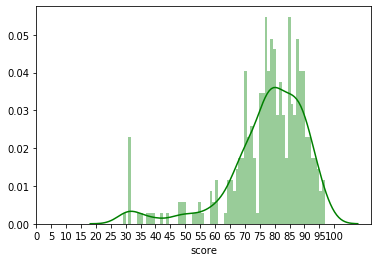

In [65]:
import math
import seaborn as sns
import matplotlib.pyplot as plt 
df = get_key_variables()
w = 4
n = math.ceil((df.score.max() - df.score.min())/w)
sns.distplot(df["score"], hist = True, bins =70, color = "green")
plt.xticks(np.arange(0, 101 , 5))
plt.yticks(np.arange(0, 0.06 , 0.01))
plt.show() 

Figure 2 demonstrates our replication of the paper's figure 1 titled "Firms’ Density Distribution by Score". In the right hand of the Due to the cutoff (75 points), the distribution of firms is denser because of the exclusion of non-scored unsubsidized companies in the second round. The density just below the threshold possesses distant values; however, this decline is not interpreted as a sign of manipulation of scores by companies just under the threshold. The paper takes the side that the committee of experts did not have understandable reasons for scoring a firm under the threshold. This conclusion is drawn by observing the appeals of the unsuccessful firms against the decision of the committee. This demonstrates that the committee takes pleasure from a specific degree of discretion in assigning the score, however, this feature does not affect the validation of the paper's design.

# IV. Results

## A. Baseline Results


In this section, we demonstrate the estimation results of the coefficient $\beta$ from the model (1) where total, tangible and intangible investment scaled by pre-program sales are our outcome variables.

There is a brief explanation of the interpretation of the coefficients due to the impossibility of separate information for private and public investment. If the estimated coefficient $\beta = 0$, there would be a complete crowding-out of private investment by public funds. That is, the private outlays are replaced by the public grants and the program turned out to be ineffective.

On the other hand, if the estimated coefficient is positive, the conclusion could be that at least total crowding-out did not occure or in the best case crowding- in happened. Moreover, a positive coefficient means that funded firms overall invested more than non-funded ones. To assess whether the partial crowding-out or even crowding-in happened, we need to compare the total investment changes with the funds.




Figure 3 is the replication of the scatterplot of the averaged outcome variables by score which is showed as Figure 2 in original paper with the title of "Full Sample" . According to our expetation, we can see that although investment across fims is greatly uneven, the interpolation lines are almost flat, a demonstration of a positive but extremely weak dependence of outcome on the score because no noticable jumps of the outcome variables at the threshold.

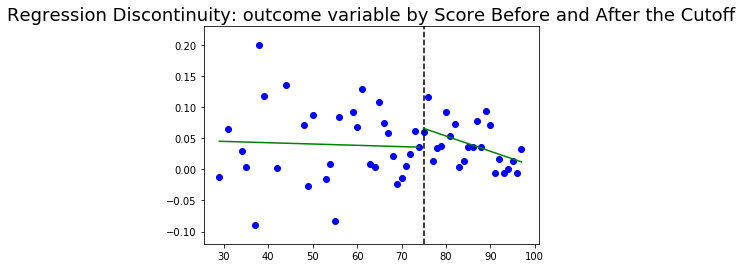

In [75]:

df_less_than_75 = df[df.score < 75]
df_larger_than_75 = df[df.score >= 75]

grouped_df_less_than_75 = df_less_than_75.groupby("score").mean().reset_index()
grouped_df_larger_than_75 = df_larger_than_75.groupby("score").mean().reset_index()


grouped_df_less_than_75 = grouped_df_less_than_75[["score", "INVSALES" ]]
grouped_df_larger_than_75 = grouped_df_larger_than_75[["score", "INVSALES" ]]

grouped_df_less_than_75 = sma.add_constant(grouped_df_less_than_75)
grouped_df_larger_than_75 = sma.add_constant(grouped_df_larger_than_75)


plt.axvline(x=75, color="black", linestyle="--")
plt.title("Regression Discontinuity: outcome variable by Score Before and After the Cutoff", fontsize="18")
plt.scatter(grouped_df_less_than_75.score, grouped_df_less_than_75.INVSALES, color="blue")
plt.scatter(grouped_df_larger_than_75.score, grouped_df_larger_than_75.INVSALES, color="blue")
result_grouped_df_less_than_75 = (sma.OLS(grouped_df_less_than_75["INVSALES"],
                                         grouped_df_less_than_75[["const", "score"]]).
                                  fit(cov_type='cluster', cov_kwds={'groups': grouped_df_less_than_75["score"]})
                                 )
result_grouped_df_larger_than_75 = (sma.OLS(grouped_df_larger_than_75["INVSALES"],
                                           grouped_df_larger_than_75[["const", "score"]]).
                                    fit(cov_type='cluster', cov_kwds={'groups': grouped_df_larger_than_75["score"]}))
plt.plot(grouped_df_less_than_75.score, result_grouped_df_less_than_75.predict(), '-', color="g")
plt.plot(grouped_df_larger_than_75.score, result_grouped_df_larger_than_75.predict(), '-', color="g")
plt.show()


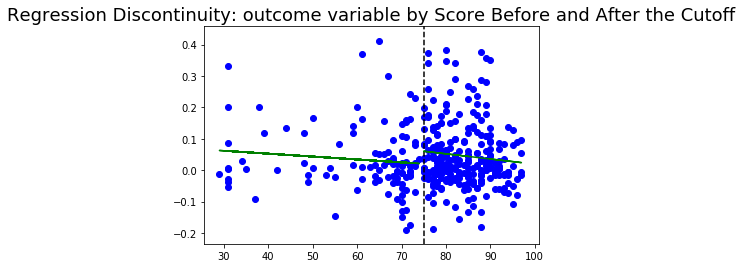

In [79]:
For varaible in outcome_Variables:

grouped_df_less_than_75 = df[df.score < 75]
df_larger_than_75 = df[df.score >= 75]




grouped_df_less_than_75 = grouped_df_less_than_75[["score", "INVSALES" ]]
grouped_df_larger_than_75 = grouped_df_larger_than_75[["score", "INVSALES" ]]

grouped_df_less_than_75 = sma.add_constant(grouped_df_less_than_75)
grouped_df_larger_than_75 = sma.add_constant(grouped_df_larger_than_75)


plt.axvline(x=75, color="black", linestyle="--")
plt.title("Regression Discontinuity: outcome variable by Score Before and After the Cutoff", fontsize="18")
plt.scatter(grouped_df_less_than_75.score, grouped_df_less_than_75.INVSALES, color="blue")
plt.scatter(grouped_df_larger_than_75.score, grouped_df_larger_than_75.INVSALES, color="blue")
result_grouped_df_less_than_75 = (sma.OLS(grouped_df_less_than_75["INVSALES"],
                                         grouped_df_less_than_75[["const", "score"]]).
                                  fit(cov_type='cluster', cov_kwds={'groups': grouped_df_less_than_75["score"]})
                                 )
result_grouped_df_larger_than_75 = (sma.OLS(grouped_df_larger_than_75["INVSALES"],
                                           grouped_df_larger_than_75[["const", "score"]]).
                                    fit(cov_type='cluster', cov_kwds={'groups': grouped_df_larger_than_75["score"]}))
plt.plot(grouped_df_less_than_75.score, result_grouped_df_less_than_75.predict(), '-', color="g")
plt.plot(grouped_df_larger_than_75.score, result_grouped_df_larger_than_75.predict(), '-', color="g")

the estimation of the coefficient $\beta$ for total, tangible, and intangible investment, shown in Table 3, confirms the aboved mentioned perception. The signs of coefficient are almost always positive  and  based on Akaike Information
Criterion (AIC) simple models namely mean differenced are preferable to polynomials with higher ordes exept one. The
sign of the coefficient is almost always positive. 

 In the benchmark of full sample, there is a jump around one-third of the average of the outcome variable for nonsubsidized firms, however, the discontinuity is insignificanet in 26 out of 30 models because of high sample variance. In fact, the results from local regression (wide and narrow window) are similar to those of whole sample showing no program's effect on total, tangible and intangible investment, however, the firm might use the sudsidy to hire high skilled employees or buy research services. therefore, we redo regression for labor costs and service costs as outcome variables. 

To test the sensitiveness preceding findings on investment, we alter the scale variable from preprogram sales to capital and total assets of pre- program year .  from the balance sheets capital is calculated the cthe sum of tangible and intangible assets (fixed assets) and Total asset is the aggregation of fixed, current, and other assets. The table 4 represents the estimations of discontinuity parameter.

Although the ceofficient of discontinuity in labor costs is almost always negative, it is insignificant in most of cases.the discontinuity coefficient of service costs is never significant with a  unstable sign across the model’s specifications. the change in scaling variable to capital and asset preprogram did not affect these results remarkedly. Finally, we replicate the firms that provided the information of employment(263 out of 357), the program's effect on log of employment and log of wages.   The table B2 represents th results of estimation for full sample and wide window because of small smaple size. The indignificetn estimated coefficients show that in coontrast to case of the United States studied by Goolsbee (1998)  the program  did not have any impact on th elevel of employment and on wages. In a nutshell,  We did not observe that the program significantly affect any of potential outcome variables and we cannot reject the complete crowding-out of private investment hypothesis.


NameError: name 'df' is not defined

In [5]:
df

NameError: name 'df' is not defined

In [ ]:

df_narr_wind = df.loc[(66 <= df.score) & (df.score <= 78), :]
df_narr_wind


df_wide_wind = df.loc[(52 <= df.score) & (df.score <= 80), :]
df_wide_wind 



X, Y = df['T'], df['INVSALES']
X =   sm.add_constant(X)
ols(X, Y)

df["NT"]  = 1-df["T"]
df["s2"]= df["s"].pow(2)
df["s3"]= df["s"].pow(3)
df["streat"] = df["s"]* df["T"]
df["s2treat"] = df["s2"]* df["T"]
df["s3treat"] = df["s3"]* df["T"]
df["snotreat"] = df["s"]* df["NT"]
df["s2notreat"] = df["s2"]* df["NT"]
df["s3notreat"] = df["s3"]* df["NT"]
ols_pol2 = ols("INVSALES ~ T ", data= df).fit(cov_type='cluster', cov_kwds={'groups': df["score"]}).summary()
ols_pol2

In [ ]:
df["NT"] = 1 - df["T"]
outcome_variables = ["INVSALES", "INVTSALES", "INVINTSALES", "INVK", "INVA", "LCSALES", "SCSALES"]

for i in outcome_variables:
    covariates = []
    for j in range(0, 4):
        df["TS"]   = df["s"].pow(j) * df["T"]
        #df["NTS"]  = df["s"].pow(j) * df["NT"]
        #LST        = ["TS", "NTS"]
        covariates.append(df["TS"])
        ols_ =ols(formula = f"{i} ~ TS" , data = df).fit(cov_type='cluster', cov_kwds={'groups': df["score"]}).summary()
       

In [ ]:
np.matmul(np.array([1, 2]), np.array([2, 1]).T)

a = np.array([1, 2])
b = np.array([1, 2])
c = list([a, b])
c

In [ ]:
def get_polynomial_estimator(score, treated, degree):
    non_treaded = 1 - treated
    polynomial_list = []
    polynomial_list[0] = treated
    for i in range(1, degree + 1):
        score_matrix = np.array([np.power(score, i), np.power(score, i)])
        treated_non_treated_matrix = np.array([treated, non_treated])
        polynomial_terms_i = np.matmul(score_matrix, treated_non_treated_matrix)
    return polynomial_list
        
        
    

In [ ]:
df_test = df.copy().head()

In [ ]:
df.T

In [ ]:
score = df_test.s.values
treated = df_test.T.values
degree = 3
get_polynomial_estimator(score, treated, degree)

In [ ]:
#s0 = 75
#s = score - s0
df["NT"] = 1 - df["T"]
#outcome_variables = ["INVSALES", "INVTSALES", "INVINTSALES", "INVK", "INVA", "LCSALES", "SCSALES"]
covariates = []
outcome_variables = ["INVSALES"]
for i in outcome_variables:
    for j in range(0, 4):
        if j == 0 :
            df["T"]   = df["s"].pow(j) * df["T"]
            ols_ =ols(formula = f"{i} ~ T" , data = df).fit(cov_type='cluster', cov_kwds={'groups': df["score"]}).summary()
            #print(ols_) 

        else:
            df["sT"]   = df["s"].pow(j) * df["T"]
            df["sNT"]  = df["s"].pow(j) * df["NT"]
            var = ["sT", "sNT"]
            covariates.extend(var)
            print(covariates)
ols_ = ols(formula = f"{i} ~ T  + {'+'.join(covariates)}" , data = df).fit(cov_type='cluster', cov_kwds={'groups': df["score"]}).summary()
            #print(ols_) 
ols_


In [ ]:
"+".join(covariates)

In [ ]:
            var =  "+".join(["sT", "sNT"])


In [ ]:
ols_pol0 = ols("INVSALES ~ C(T) ", data= df).fit(cov_type='cluster', cov_kwds={'groups': df["score"]}).summary()
ISS_pol1 = ols("INVSALES ~ T + streat + snotreat ", data = df).fit(cov_type='cluster', cov_kwds={'groups': df["score"]}).summary()
#ISS_pol2 = ols("INVSALES ~ T +  +streat + snotreat + s2treat + s2notreat", data = df).fit(cov_type='cluster', cov_kwds={'groups': df["score"]}).summary()
ISS_pol3 = ols("INVSALES ~ T +  +streat + snotreat + s2treat + s2notreat + s3treat + s3notreat", data = df).fit(cov_type='cluster', cov_kwds={'groups': df["score"]}).summary()

ISS_pol3

# B. Results by Firm Size
Although no evidence of the public subsidy effectiveness for full sample has been found.  based on capital market imperfection literature, It is likely for small firms that usually struggle with accessing capital market to finance their project, the public funding lead to additional marginal investment. This happens for several reasons. the formost reason is that because of  information asymmetries of small companies, the abilities of their managment are less observable. secondly, the lack of enough collateral because of their high degree of risk and last but not least, their earnings are more volatale resulted from few divisties in their products. Consequently, they are more dependent on and less able to finance their project externaly. As a result, according to some of previous emprical studies, we might conclude that the effictiveness of the innovation gran could have an inverse relation to the firm size. (e.g., Lach 2002; and González, Jaumandreu, and Pazó 2005).

 we add the interation of firm_size dummy variable and treatment dummy and also score variable to check the existence of heterogounous causal effect based on firm size. 


 \begin{equation}
 (2)~~~~ Y_{i} = (1 − T_{i}) \sum_{k =1}^{2} \alpha_{k} Size_{i}^k + T_{i} \sum_{k=1}^{2}\beta_{k} Size_{i}^k + (1 - T_{i})\sum_{k = 1}^{2} \sum_{p = 1}^{3}\gamma_{kp} Size_{i}^k (S_{i})^p + T_{i} \sum_{k = 1}^{2} \sum_{p = 1}^{3}\gamma_{kp}'Size_{i}^k (S_{i})^p + \eta_{i}
\end{equation} 

where $Size_{i}^1 = 1$ if the firm's value-added is under the median and zero otherwise(Small); $Size_{i}^2 = 1$ if the value-added is above the median and zero otherwise (Large). Note that the results are not sensetive to the choice of variable identifying the size. The abovemnetioned model shows the heterogeneity between small and large firms close to the threshold through the interaction between the dummy treatment and size.

The causal effect of the program  for firm k is denoted by the parameter $\beta_{k} = 1$ k. In the sample firms have considerable size difference which is helpful for capturing the potential heterogeneity of the treatment effect across firms. Also, 249 firms out of 357 just founded in 2003; the median employee of large firms is 132(mean = 382.1)  which is 5 times larger than that of small firms with median of 26 times (mean = 27.5). 
 
 First of all we sudy whethet the treated and untreated companies are similar enough within their categories. Table 1 displays the distribution of firms by size, sector, and treatment. Table B3 mean differences of observable characteristics of two different groups of treated and untreated by size. Based on those tables, the distribution of treated and untreated firms do no differ across sectors and large(small) treated and large(small) untreated companies are similar close to cutoff for multiple variables, which supports the implementation of model for each of subsamples.
Figures 3 and 4 demonstrate the investment scaled bz preporagmram sales against the score for the two categories and  the independenczyof investment from score, null effect for large firms and considerable positive effect for small ones  could be observed.

Table 5 shows the findings from the estimation of model (2) for total, tangible, and intangible investment. The impact of program is statistically significant and positive for small companies For, which is robust to the funcitonal form and the sample selection. the discontinuity is the positive and significant estimate of discontinutitz of whole sample is shown for whole smaple in panel A , wide  in panel B and narrow windows in panel C. Merely in one case of quadratic model for the narrow sample, the parameter of discontinuity is significant. conversly, the negative coffiecient is statistically in significant for large firms due to the inefficiency. The estimated coefficient for both tangible and intangible assets seem to be balanced and similar. This could verify that the intangible and physical assets are compelentary.
The polynomial of degree zero is considered as our benchmark because of lowest amount of AIC.
The increase in estimated coefficient of investment in the polynomal of degree 0 for full sample is twice the average of untreated fims and 40 percent of its standard deviation. One point has to  be taken is that the average amount of grant for small firms which quals to €173,000 is considerable comparing to the average of the privet investment of untreated firms which is €107,000. The replication of estimates for other outcome variables such as labor and service costs in Table B4 that shows no change in non of costs for both small and large groups.

Finally, we replicate the verification of the program effectiveness on log of emplyment and wages in table B2.  despite the coefficient sensetivity to the model, we can conclude that there is impact on emplyment and wage. However, the discon coefficient emplyment for small firms and wage for large firms  are significant.

To check the effectivness of policy on small firms more precisely and capture the partial crowding out or crowding in, we replicate the reestimation of moel 2 without the dummy variable of treatment, where total investment is the outcome varible and dirstributed subsidies is a covariate instead of treatment dummy T.


\begin{equation}
 (3)~~~~ INV_{i} = (1 − T_{i}) \sum_{k =1}^{2} \alpha_{k} Size_{i}^k + GRANT_{i} \sum_{k=1}^{2}\beta_{k} Size_{i}^k + (1 - T_{i})\sum_{k = 1}^{2} \sum_{p = 1}^{3}\gamma_{kp} Size_{i}^k (S_{i})^p + T_{i} \sum_{k = 1}^{2} \sum_{p = 1}^{3}\gamma_{kp}'Size_{i}^k (S_{i})^p + \eta_{i}
\end{equation} 

The interpretation of coefficient \beta_{K} is as follows:

 the $\beta_{K} > 1$ would convey that on average partial crowding-out happend, meaning that the change in the  amount of investment
produced by the grant was larger than the subsidy. the $\beta_{K} > 1$ implies that on average partial crowding-in occured, indicating that the change in the amount of investment
produced by the grant was smaller than the subsidy. Finally, $\beta_{K} = 1$ means that the increase in the investment was as large as the subsidy received.
From table 5 representing the estimations of v$\beta_{K}$ in model (3) we can find out that the parameter for small firms is extremely close to 1 and significant in the polynomial of degree zero (eqtivalent to the mean zero). In the linear model or polynomials with higher-degree models the magnitude of the coefficient would rises but not significant in all cases. Another finding is that the hypothesis of $\beta_{small} = 1$ has been admitted largely by t-tests, computed with robust standard errors clustered by score) in each of models. This means that recipiant small firms  raised their total investment due to the program as large as the amount of public fund. On contrast, for  larger firms received the public grants the  completel crowding_out happend.

## C. Why Was the Program Effective for Smaller Firms?

The results in previous section indicate the effectiveness of policy only for small firms, which is aligned with(in line) with precedint econometric studies such as Lach 2002; González,
Jaumandreu, and Pazó 2005 and the study of the Bank of Italy on a sample of Italian firms with
more than 50 employees showing that two-thirds smaller industrial enterprises do not spend on R&D investments without public grants. Yet, one-thirds of large firms conduct R&D investment only with public funds.
Bronzini and Lachini claim that the heterogeneity in impact of the policy between large and small companies resulted from the certain characteristic of program, allocating a 10 percent larger amount of subsidy for SME firms. In order to check their hzpothesis they study the role of a variable named by athors as coverage ratio calculated through the dividion of grant by the cost of granted project. The argument is that firms with higher coverage ratio are more likely to be effectively affected by the policy therefore if the test shows that the higher covarage ratio firms are smaller ones we can explain the heterogenious effect of the program among sme and large enterprises and explore whether there is a relation between the amount of subsidy and its effectiveness. escriptive statistics of the coverage ratio. The sample distribution of coverage ratio as shown in graph () is bell-shape normal with mean and median equal to 0.40. the standard deviation of 0.05(the first third quantiles are equal to 0.38 and 0.43, respectively) impliying that coverage ratio homogeneity in firms above and below the mean(median).
 The latter is greater for small firms than for
large ones, but the gap is very narrow: the mean is equal to 0.41 for small and 0.40
for large firms (median values are very close to the means). (((((The latter is greater for small firms than for
large ones, but the gap is very narrow: the mean is equal to 0.41 for small and 0.40
for large firms (median values are very close to the means).))))) From the graph, a marginal role of coverage ration could be detected. Howevere, to test precisely we set a model and estimate the coefficient.
The model 4 has been set to test the role of the coverage ratio

 \begin{equation}
  (1)~~ ~~~   Y_{i} = (1 − T_{i}) \sum_{j = 1}^{2} \alpha_{j} Intens_{i}^j + T_{i}\sum_{j = 1}^{2}\beta_{j} Intens_{i}^j + (1 − T_{i}) \sum_{j = 1}^{2} \sum_{p = 1}^{2} \gamma_{jp} Intens_{i}^j (S_{j})^p + T_{i} \sum_{j = 1}^{2} \sum_{p = 1}^{2}  \gamma_{jp}' Intens_{i}^j (S_{j})^p  + v_{i}
\end{equation} 



where the intensity of subsidy is denoted by Intens_{1} = High and Intens_{2} = Low. the coverage ratio is a dummy variable of High (Low). If coeffcient High (Low) is 1, the subsdidy/cost of the
project of firm i is higher (lower) than the median of the overall firms’ distribution, and 0 otherwise.

The firs column of table 6 shows the result of model 4. although coefficients for both high- and low-fund intesity firms are often positive and the parameters for low subsidy intensity companies are often greater that those of firms with high grant intesit, only few times are statisti cally signifivant. in fact, based on F test, the null hypaphesis claiming the equality of highe and low grant coverage ration could not been rejected. cosequently, there could be another reason for the effectivness of public funding in small firms, which is the help of subsidy to resolve their difficulty in accessing capital markets. From the , Hennessy and Whited (2007) there is negative correlation between the size of firms and its capital cost. which was seconded by  Hall and Lerner (2009) concluding that the cost of capital for smaller firms is higher than larger rivals. Therefore, the smaller provately firms' projects are more likely to be unprofitable because of information asymmetry and cost of capita; therefre the public financial help them run the marginal project consequently the program is effective merely for them.  

To verify if the public funding for firms with tougher financial fractions is more impactful, we need to detect that subsidies affected the investmen of these companies more vigorously. 
we divide the full sample to two parts of zoung and old. Besides siye, the age feature is a crucial facor fr access to the capital mrket or determination og capital cost.

In [ ]:
))))we interpret our results as a sign of the importance of the financial channel.)))))))
 Younger firms
are more exposed to information problems because the reputation of the company
and the management is less well established. Moreover, young firms are perceived
as being riskier than mature enterprises because bankruptcies are more frequent for
them. This can aggravate asymmetric information and adverse selection problems
thereby deepening financial frictions. In addition, young firms have had less time in
which to accumulate earlier profits to finance investment with internal funds, and to
develop strong relationships with banks that might mitigate problems of asymmetric information. Empirical support of this view comes, for example, from Brown,
Fazzari, and Petersen (2009) who found that financial frictions affected R&D investment of younger firms in the United States, but did not affect those of more mature
enterprises.
In our sample, information on firm age (year of establishment) is drawn by
balance-sheet data and is available only for 300 out of 357 firms in our regression
sample. To conduct the exercise we split the sample between younger and older firms
according to the median foundation year (1987). In Table 6 we present the results of
the estimation of model (2) where dummies for size are substituted by dummies for
age defined as follows: younger = 1 if the foundation year is above the median and
equal to zero otherwise; older = 1 if the foundation year is below the median and
zero otherwise. Of course, size and age are positively correlated, but in our sample
a significant share of large firms (35 percent) falls in the sample of younger firms.
Thus, the exercise is not a mere replication of the previous one on size.
Our econometric results are in line with our expectations. There is strong evidence that for younger firms the program was effective whereas for older ones it
was not. The coefficient for young firms is positive and almost always statistically
significant, whereas for older firms the size of the impact is much smaller and never
statistically significant.
In the second exercise we break down the sample according to firms’ financial
vulnerability. We measure the vulnerability by using the amount of short-term
credit actually drawn by enterprises from banks, relative to the short-term credit
granted by banks. Short-term credits include mainly banking current account overdrafts together with other short-term banking loans. Banks charge firms that utilize

In [ ]:
short-time lines of credit a penalty interest rate: consequently, we envisage that only
firms facing financial tensions, and which are therefore more financially vulnerable, are willing to use them. The source of data is the Italian Central Register,
held by the Bank of Italy, which gathers detailed information on bank loans granted
above the threshold of €75,000. Short-term bank credit is calculated the year before
the program was launched. The econometric model is analogous to model (2). We
split the sample between financially fragile firms—those that made use of this line
of credit—and financially healthier firms—those that did not. Out of 357 firms in
our baseline sample, we find the information for 322 enterprises, of which 89 are
defined as financially fragile.27
The results are displayed in the last columns of Table 6. The coefficients are
usually positive and much larger for fragile than for healthy enterprises. They
are also statistically significant in the models preferred by the AIC in the full and
wide-window sample. However, overall the parameters are less precisely estimated
and sometimes statistically insignificant.28
On the whole, the empirical evidence suggests that the incentives were more
effective for firms that in principle might be more exposed to financial frictions, but
the results of the last exercises are less clear-cut than those for size or age. Given the
overall outcomes we are inclined to believe that asymmetric information and adverse
selection problems in the financial market, affecting access to capital markets and
the cost of capital, have played a significant role in explaining the heterogeneous
effect of the policy across firms. Yet, we cannot exclude that other factors might
have contributed, and that the financial channel could not be the only explanation.
V. Robustness
In this section we present some robustness checks of our main findings carried
out on the sample of industrial firms. As a first check, we introduce pre-treatment
firm-observables in models (1) and (2) to increase the precision of our estimates
and correct for potential imbalances between treated and untreated firms that might
be correlated with the outcome variable, for example differences in sectoral composition. This imbalance might be larger in the exercise with the sample split, when
the number of firms is reduced. The covariates introduced consist of two-digit sectoral dummies and some observables that in principle may be correlated with the
investment: gross operative margin/sales (a measure of operative profitability), cash
flows/sales (proxy of the self-financing capability), own capital/debts (measuring
the leverage), financial costs/debts(proxy of the cost of borrowing), returns on assets
(ROA), and total assets (measures of size). All variables refer to the pre-treatment
period. The results shown in the online Appendix (Table B6) are remarkably similar

In [ ]:
to the baseline ones. The coefficients turn out to be close in magnitude to those previously estimated and highly statistically significant for small firms.
As a supplementary robustness exercise we use, as further outcome variables,
nonnormalized investment and the log of investment. The results shown in Table B7
in the online Appendix confirm the baseline outcomes. Next we use as further normalization the pre-program capital and replicate the estimates of model (2) by dividing the sample into small and large firms. Also in this case the findings are largely
analogous to those obtained with the benchmark outcome variable: the effect is limited to small firms (see Table B8 in the online Appendix). The main results also hold
if we winsorize the sample (at 5 percent of the investment over sales distribution)
or trim the sample at 2 percent (instead of trimming at 5 percent). Given the lower
precision of the estimates, however, trimming at 2 percent produces coefficients that
are less statistically significant but similar in size. For the sake of brevity the results
are not shown but available upon request.
We further verify whether our main results depend on the estimation methods. To
this end, we run kernel regressions of models (1) and (2) using the Epanechnikov
kernel, several polynomials, and different bandwidths: 30 and 15 points of the score
(below and above the threshold). The results shown in Tables B9 and B10 in the
online Appendix confirm those previously obtained. The coefficients are significant
only for the investment of small firms and very close in their magnitude to the earlier ones. By using the triangular kernel or different bandwidths we obtain similar
findings.
RD identification strategy relies on the continuity assumption, which requires
that potential outcome should be smooth around the cutoff point in the absence of
the program. There is no direct way to verify this hypothesis. However, we can run
some indirect tests. A first one is to verify if some firms’ covariates that in principle
should not be affected by the treatment (at least in the short run) are continuous at
the cutoff. If we do not observe jumps it is plausible that the outcome variable would
also have been continuous without the treatment. The exercise is run using the following observables that could, in principle, be correlated with investment: profitability (ROA), net assets over debts, cash flow over sales, and costs of debts (interest
costs over debts). We replicated the estimates of model (2) using these covariates as
outcomes. We find extremely few significant discontinuities (see Table B11 in the
online Appendix).
Another indirect way to test for the continuity assumption is to verify whether the
outcome variable before the program was smooth across the cutoff. If we observe
a smooth function before the program took place, it is plausible that the jump we
observe after the program is due to the subsidy. Therefore, we re-estimated model (2)
using investment in the period before the program as our outcome variable. Note
that since in the baseline exercise we accumulated the investment over some years
after the program, to make the robustness exercise as comparable to the baseline
estimates as possible we accumulated the investment over the two years before the
program. Table B12 (panel 1) in the online Appendix and Figure 5 show that before
the program there were no jumps in investment of small firms.
Finally, we check whether there are discontinuities of investment at score values
other than the cutoff point. If the jump of the function is unique at the point that

In [ ]:
divides subsidized from unsubsidized firms, the evidence in favor of the causality
effect of the program becomes more persuasive. We implement the following test
suggested by Lee and Lemieux (2010). We estimate the baseline model (2) adding
a complete set of score dummies variables interacted with the small-firm dummy.
Then, we test the null hypothesis that the coefficients of these dummies are jointly
not statistically different from zero. If we accept the null hypothesis, we can conclude that there are no other jumps of the investment: the only one is at the threshold. Panel 2 of Table B12 (in the online Appendix) reports the values of the F-test of
this exercise. From the table it is evident that no other discontinuities are detected.
VI. Conclusions
This paper contributes to the existing literature on the effects of incentives for
firms’ R&D investment. We evaluated the impact of a place-based program implemented in a region of northern Italy. Using a sharp regression discontinuity strategy
we find that on the whole grants did not have a positive effect on firms’ R&D outlays. However, when we differentiate firms by size, we find that for small firms the
grants triggered substantial additional investment while for large ones they did not.
The change in investment of small firms on average matched the subsidy received.
Overall, our results are in line with those of Lach (2002); González, Jaumandreu,
and Pazó (2005); and recently by Criscuolo et al. (2012), who assessed a major program that supported business investment in the United Kingdom. All of them found
positive effects of the incentives mainly for small firms.
We argue that the effect of the program is greater on small firms because they are
more exposed to financial frictions. To test for this hypothesis we verify whether the
impact of the program also proved stronger for other categories of firm that in principle might have less or more costly access to capital market, because of stronger
asymmetric information and adverse selection problems, namely younger and more
financially vulnerable firms. The overall evidence suggests that the financial channel
plays a substantial role in explaining the heterogeneous effect of the policy across
firms; however, the results cannot allow us to exclude that other factors might have
contributed. As a result, we believe that more work should be done to better understand all the forces driving the heterogeneous effect of subsidies.
We analyzed the direct effects of the policy on the main target variables. Of
course, there are other interesting issues that we did not address but that nonetheless merit attention. One is the long-term effect of the grants on the economic performance of recipient firms. Then there are the indirect effects of the program. Of
these, the presence of spillovers is one of the most significant. An increase in R&D
investment might produce positive spillovers across firms that, in terms of social
welfare, could even offset the cost of having unsuccessfully financed larger enterprises. For regional programs an interesting question is also to investigate whether
spillovers are localized. To understand these effects would be highly rewarding,
albeit empirically challenging.

In [ ]:
ols_pol0 = ols("INVSALES ~ T", data= df).fit(cov_type='cluster', cov_kwds={'groups': df["score"]}).summary()

In [ ]:
SC_pol0 = ols("SCSALES ~ T ", data = df_narr_wind).fit(cov_type='cluster', cov_kwds={'groups': df_narr_wind["score"]}).summary()

In [ ]:
ww_pol222 = ols("INVINTSALES ~ T +  +streat + snotreat + s2treat + s2notreat", data = df_wide_wind).fit(cov_type='cluster', cov_kwds={'groups': df_wide_wind["score"]}).summary()


In [ ]:
ww_pol222

In [ ]:
ISF_pol0

In [ ]:

df_large = df.loc[df["SIZE"]=="large", :]
#df_large

df_small = df.loc[ df["SIZE"] == "small" , : ]
#df_small["s"]

In [ ]:
ISS_pol0 = ols("INVSALES ~ T", data = df_small).fit(cov_type='cluster', cov_kwds={'groups': df_small["score"]}).summary()
ISS_pol1 = ols("INVSALES ~ T + streat + snotreat ", data =  df_small).fit(cov_type='cluster', cov_kwds={'groups': df_small["score"]}).summary()
ISS_pol2 = ols("INVSALES ~ T +  streat + snotreat + s2treat + s2notreat", data =  df_small).fit(cov_type='cluster', cov_kwds={'groups': df_small["score"]}).summary()
ISS_pol3 = ols("INVSALES ~ T +  streat + snotreat + s2treat + s2notreat + s3treat + s3notreat", data =  df_small).fit(cov_type='cluster', cov_kwds={'groups': df_small["score"]}).summary()


ISL_pol0 = ols("INVSALES ~ T", data = df_large).fit(cov_type='cluster', cov_kwds={'groups': df_large["score"]}).summary()
ISL_pol1 = ols("INVSALES ~ T + streat + snotreat ", data =  df_large).fit(cov_type='cluster', cov_kwds={'groups': df_large["score"]}).summary()
ISL_pol2 = ols("INVSALES ~ T +  +streat + snotreat + s2treat + s2notreat", data =  df_large).fit(cov_type='cluster', cov_kwds={'groups': df_large["score"]}).summary()
ISL_pol3 = ols("INVSALES ~ T +  +streat + snotreat + s2treat + s2notreat + s3treat + s3notreat", data =  df_large).fit(cov_type='cluster', cov_kwds={'groups': df_large["score"]}).summary()

In [ ]:
#ISS_pol0
#ISS_pol1
#ISS_pol2
#ISS_pol3

In [ ]:
ISS_pol0

In [ ]:
ISL_pol0

In [ ]:
ISL_pol2

In [ ]:
ISL_pol3

In [ ]:
# tangible investment/presales program by firm's size
ITS_pol0 = ols("INVTSALES ~ T", data = df_small).fit(cov_type='cluster', cov_kwds={'groups': df_small["score"]}).summary()
ITS_pol1 = ols("INVTSALES ~ T + streat + snotreat ", data =  df_small).fit(cov_type='cluster', cov_kwds={'groups': df_small["score"]}).summary()
ITS_pol2 = ols("INVTSALES ~ T +  +streat + snotreat + s2treat + s2notreat", data =  df_small).fit(cov_type='cluster', cov_kwds={'groups': df_small["score"]}).summary()
ITS_pol3 = ols("INVTSALES ~ T +  +streat + snotreat + s2treat + s2notreat + s3treat + s3notreat", data =  df_small).fit(cov_type='cluster', cov_kwds={'groups': df_small["score"]}).summary()


ITL_pol0 = ols("INVTSALES ~ T", data = df_large).fit(cov_type='cluster', cov_kwds={'groups': df_large["score"]}).summary()
ITL_pol1 = ols("INVTSALES ~ T + streat + snotreat ", data =  df_large).fit(cov_type='cluster', cov_kwds={'groups': df_large["score"]}).summary()
ITL_pol2 = ols("INVTSALES ~ T +  +streat + snotreat + s2treat + s2notreat", data =  df_large).fit(cov_type='cluster', cov_kwds={'groups': df_large["score"]}).summary()
ITL_pol3 = ols("INVTSALES ~ T +  +streat + snotreat + s2treat + s2notreat + s3treat + s3notreat", data =  df_large).fit(cov_type='cluster', cov_kwds={'groups': df_large["score"]}).summary()

In [ ]:
ITS_pol0

In [ ]:
ITS_pol1

In [ ]:
ITS_pol2

In [ ]:
ITS_pol3

In [ ]:
ITL_pol0

In [ ]:
ITL_pol1

In [ ]:
ITL_pol2

In [ ]:
ITL_pol3

In [ ]:
df_narr_small = df.loc[(66 <=df.score) & (df.score <= 78) & (df.SIZE == "small") , :]
df_narr_large = df.loc[(66 <=df["score"]) & (df["score"] <= 78) & (df["SIZE"] == "large") , :]

df_wide_small = df.loc[(52 <=df.score) & (df.score <= 80) & (df.SIZE == "small") , :]
df_wide_large = df.loc[(52 <=df["score"]) & (df["score"] <= 80) & (df["SIZE"] == "large") , :]


In [ ]:
# total investment/pre-sales program by firm's size
ITSW_pol0 = ols("INVSALES ~ T", data = df_wide_small).fit(cov_type='cluster', cov_kwds={'groups': df_wide_small["score"]}).summary()
ITSW_pol1 = ols("INVSALES ~ T + streat + snotreat ", data = df_wide_small).fit(cov_type='cluster', cov_kwds={'groups': df_wide_small["score"]}).summary()
ITSW_pol2 = ols("INVSALES ~ T +  +streat + snotreat + s2treat + s2notreat", data = df_wide_small).fit(cov_type='cluster', cov_kwds={'groups': df_wide_small["score"]}).summary()




In [ ]:
ITSW_pol0 

In [ ]:
ITSW_pol1

In [ ]:
ITSW_pol2

In [ ]:
ITLW_pol0 = ols("INVSALES ~ T", data = df_wide_large).fit(cov_type='cluster', cov_kwds={'groups': df_wide_large["score"]}).summary()
ITLW_pol1 = ols("INVSALES ~ T + streat + snotreat ", data =  df_wide_large).fit(cov_type='cluster', cov_kwds={'groups': df_wide_large["score"]}).summary()
ITLW_pol2 = ols("INVSALES ~ T +  +streat + snotreat + s2treat + s2notreat", data =  df_wide_large).fit(cov_type='cluster', cov_kwds={'groups': df_wide_large["score"]}).summary()


In [ ]:
ITLW_pol0

In [ ]:
ITLW_pol1

In [ ]:
ITLW_pol2

In [ ]:
# tangible investment/presales program by firm's size
ITS_pol0 = ols("INVTSALES ~ T", data = df_narr_small).fit(cov_type='cluster', cov_kwds={'groups': df_narr_small["score"]}).summary()
ITS_pol1 = ols("INVTSALES ~ T + streat + snotreat ", data =  df_narr_small).fit(cov_type='cluster', cov_kwds={'groups': df_narr_small["score"]}).summary()
ITS_pol2 = ols("INVTSALES ~ T +  +streat + snotreat + s2treat + s2notreat", data =  df_narr_small).fit(cov_type='cluster', cov_kwds={'groups': df_narr_small["score"]}).summary()


ITL_pol0 = ols("INVTSALES ~ T", data = df_narr_large).fit(cov_type='cluster', cov_kwds={'groups': df_narr_large["score"]}).summary()
ITL_pol1 = ols("INVTSALES ~ T + streat + snotreat ", data =  df_narr_large).fit(cov_type='cluster', cov_kwds={'groups': df_narr_large["score"]}).summary()
ITL_pol2 = ols("INVTSALES ~ T +  +streat + snotreat + s2treat + s2notreat", data =  df_narr_large).fit(cov_type='cluster', cov_kwds={'groups': df_narr_large["score"]}).summary()


In [ ]:
ITS_pol0

In [ ]:
ITS_pol1

In [ ]:
ITS_pol2

In [ ]:
#Intangible investment/pre-program sales in narrow window sample
IINTS_pol0 = ols("INVINTSALES ~ T", data = df_narr_small).fit(cov_type='cluster', cov_kwds={'groups': df_narr_small["score"]}).summary()
IINTS_pol1 = ols("INVINTSALES ~ T + streat + snotreat ", data =  df_narr_small).fit(cov_type='cluster', cov_kwds={'groups': df_narr_small["score"]}).summary()
IINTS_pol2 = ols("INVINTSALES ~ T +  +streat + snotreat + s2treat + s2notreat", data =  df_narr_small).fit(cov_type='cluster', cov_kwds={'groups': df_narr_small["score"]}).summary()


IINTL_pol0 = ols("INVINTSALES ~ T", data = df_narr_large).fit(cov_type='cluster', cov_kwds={'groups': df_narr_large["score"]}).summary()
IINTL_pol1 = ols("INVINTSALES ~ T + streat + snotreat ", data =  df_narr_large).fit(cov_type='cluster', cov_kwds={'groups': df_narr_large["score"]}).summary()
IINTL_pol2 = ols("INVINTSALES ~ T +streat + snotreat + s2treat + s2notreat", data =  df_narr_large).fit(cov_type='cluster', cov_kwds={'groups': df_narr_large["score"]}).summary()


In [ ]:
ITS_pol0

In [ ]:
IINTS_pol1

In [ ]:
IINTS_pol2

In [ ]:
IINTL_pol0

In [ ]:
IINTL_pol1

In [ ]:
IINTL_pol2

In [ ]:
# investment full sample
IS_pol0 = ols("INV ~ T", data = df_small).fit(cov_type='cluster', cov_kwds={'groups': df_small["score"]}).summary()
IS_pol1 = ols("INV ~ T + streat + snotreat ", data =  df_small).fit(cov_type='cluster', cov_kwds={'groups': df_small["score"]}).summary()
IS_pol2 = ols("INV ~ T +  +streat + snotreat + s2treat + s2notreat", data =  df_small).fit(cov_type='cluster', cov_kwds={'groups': df_small["score"]}).summary()


# investment full sample
ISF_pol0 = ols("INV ~ T", data = df_small).fit(cov_type='cluster', cov_kwds={'groups': df_small["score"]}).summary()
ISF_pol1 = ols("INV ~ T + streat + snotreat ", data =  df_small).fit(cov_type='cluster', cov_kwds={'groups': df_small["score"]}).summary()
ISF_pol2 = ols("INV ~ T +streat + snotreat + s2treat + s2notreat", data =  df_small).fit(cov_type='cluster', cov_kwds={'groups': df_small["score"]}).summary()
ISF_pol2 = ols("INV ~ T +streat + snotreat + s2treat + s2notreat + s3treat + s3notreat", data =  df_small).fit(cov_type='cluster', cov_kwds={'groups': df_small["score"]}).summary()

# investment full sample
ILF_pol0 = ols("INV ~ T", data = df_large).fit(cov_type='cluster', cov_kwds={'groups': df_large["score"]}).summary()
ILF_pol1 = ols("INV ~ T + streat + snotreat ", data = df_large).fit(cov_type='cluster', cov_kwds={'groups': df_large["score"]}).summary()
ILF_pol2 = ols("INV ~ T +streat + snotreat + s2treat + s2notreat", data = df_large).fit(cov_type='cluster', cov_kwds={'groups': df_large["score"]}).summary()
ISF_pol2 = ols("INV ~ T +streat + snotreat + s2treat + s2notreat + s3treat + s3notreat", data =  df_small).fit(cov_type='cluster', cov_kwds={'groups': df_small["score"]}).summary()

#investment in narrow window sample
IS_pol0 = ols("INV ~ T", data = df_narr_small).fit(cov_type='cluster', cov_kwds={'groups': df_narr_small["score"]}).summary()
IS_pol1 = ols("INV ~ T + streat + snotreat ", data =  df_narr_small).fit(cov_type='cluster', cov_kwds={'groups': df_narr_small["score"]}).summary()
IS_pol2 = ols("INV ~ T +streat + snotreat + s2treat + s2notreat", data =  df_narr_small).fit(cov_type='cluster', cov_kwds={'groups': df_narr_small["score"]}).summary()

#investment in wide window sample
IL_pol0 = ols("INV ~ T", data = df_narr_large).fit(cov_type='cluster', cov_kwds={'groups': df_narr_large["score"]}).summary()
IL_pol1 = ols("INV ~ T + streat + snotreat ", data =  df_narr_large).fit(cov_type='cluster', cov_kwds={'groups': df_narr_large["score"]}).summary()
IL_pol2 = ols("INV ~ T +streat + snotreat + s2treat + s2notreat", data =  df_narr_large).fit(cov_type='cluster', cov_kwds={'groups': df_narr_large["score"]}).summary()


In [ ]:
IS_pol1

In [ ]:
df["sizem"] = np.nan
df.loc[df["SIZE"] == "small", "sizem"] = 1
df.loc[df["SIZE"] == "large", "sizem"] = 0

df["SF"] = df["sizem"]
df["LF"] = 1 - df["sizem"]
#df_small = df.loc[df["sizem"] == 1 , : ]
#df_small["SF"] = df


In [ ]:
df["largem"]  = np.nan
df["slarge"]  = np.nan
df["s2large"] = np.nan
df["s3large"] = np.nan

df["largem"]  = df["LF"]
df["slarge"]  = df["s"] * df["largem"]
df["s2large"] = df["s"].pow(2) * df["largem"]
df["s3large"] = df["s"].pow(3) * df["largem"]

In [ ]:
df["smallem"]  = np.nan
df["ssmallem"]  = np.nan
df["s2smallem"] = np.nan
df["s3smallem"] = np.nan

df["smallem"]  = df["SF"]
df["ssmallem"]  = df["s"] * df["smallem"]
df["s2smallem"] = df["s"].pow(2) * df["smallem"]
df["s3smallem"] = df["s"].pow(3) * df["smallem"]

In [ ]:
# total investment/pre-sales program by firm's size
ISF_pol0 = ols("INVSALES ~ T", data = df).fit(cov_type='cluster', cov_kwds={'groups': df["score"]}).summary()
ISF_pol1 = ols("INVSALES ~ T + ssmallem + slarge", data = df).fit(cov_type='cluster', cov_kwds={'groups': df["score"]}).summary()
ISF_pol2 = ols("INVSALES ~ T +ssmallem + slarge + s2smallem + s2large", data = df).fit(cov_type='cluster', cov_kwds={'groups': df["score"]}).summary()
ISF_pol2 = ols("INVSALES ~ T +ssmallem + slarge + s2smallem + s2large + s3smallem + s3large", data = df).fit(cov_type='cluster', cov_kwds={'groups': df["score"]}).summary()

In [ ]:
ILF_pol0 = ols("INV ~ T", data = df_large).fit(cov_type='cluster', cov_kwds={'groups': df_large["score"]}).summary()
